<a href="https://colab.research.google.com/github/EstefanoJesus/A_AlgoritmoYEstructuraDeDatos/blob/main/A_Semana9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arboles AVL, todo sobre las rotaciones...

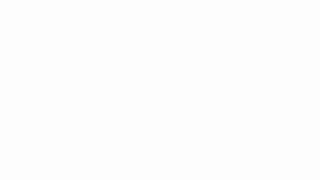

Tener presente la siguiente propiedad de balance:

      Para todo nodo x del ABB, la diferencia entre las alturas de sus subárboles izquierdo y derecho es −1, 0 ó 1.

Como se aprecia en la ilustración el reequilibrado se produce de abajo hacia arriba sobre los nodos en los que se produce el desequilibrio.

Existen 4 tipos de rotaciones para lograr reequilibrar:

#Rotación simple a la derecha:

  La rotación a la derecha en un árbol AVL es una operación que reorganiza los nodos de manera que un nodo se convierte en el nuevo nodo raíz de su subárbol, y los nodos que estaban a su derecha se mueven hacia abajo y a la derecha. Esta rotación se utiliza para mantener o restaurar el equilibrio en el árbol AVL cuando el subárbol izquierdo tiene una altura mayor que el subárbol derecho.

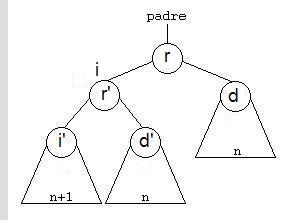

#Rotacion simple a la izquierda

La rotación a la izquierda en un árbol AVL es una operación que reorganiza los nodos de manera que un nodo se convierte en el nuevo nodo raíz de su subárbol, y los nodos que estaban a su izquierda se mueven hacia abajo y a la izquierda. Esta rotación se utiliza para mantener o restaurar el equilibrio en el árbol AVL cuando el subárbol derecho tiene una altura mayor que el subárbol izquierdo.

* Precondición : Tiene que tener hijo derecho no vacío.

#Rotacion doble a la derecha

La Rotación doble a la Derecha son dos rotaciones simples, primero rotación simple izquierda y luego rotación simple derecha.

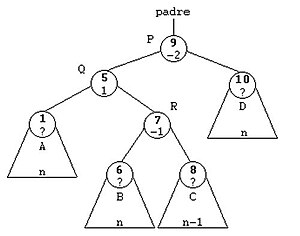

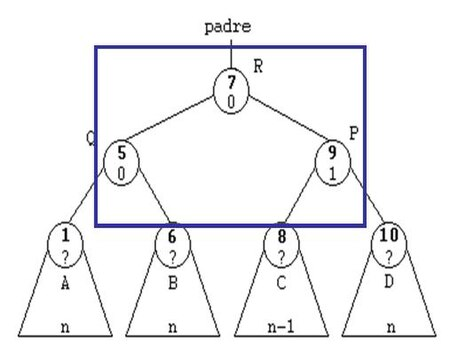

#Rotación doble a la izquierda

La Rotación doble a la Izquierda son dos rotaciones simples, primero rotación simple derecha y luego rotación simple izquierda.

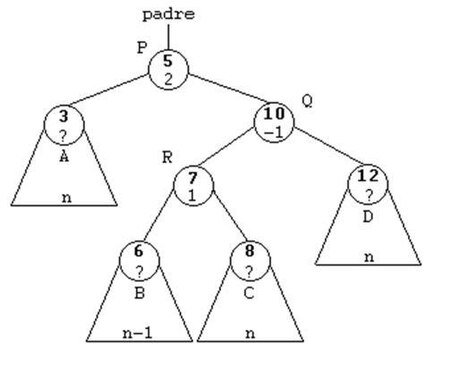

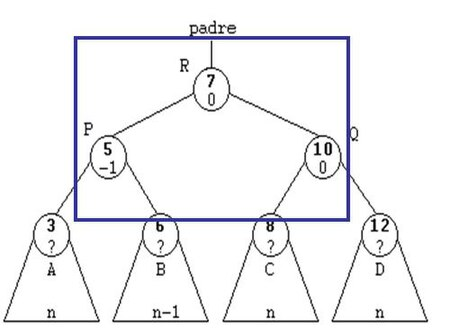

#Insercion!

La inserción en un árbol de AVL puede ser realizada insertando el valor dado en el árbol como si fuera un árbol de búsqueda binario desequilibrado y después retrocediendo hacia la raíz, rotando sobre cualquier nodo que pueda haberse desequilibrado durante la inserción.

  Proceso de inserción:

      1.-Buscar hasta encontrar la posición de inserción o modificación (proceso idéntico a inserción en árbol binario de búsqueda).

      2.-Insertar el nuevo nodo con factor de equilibrio “equilibrado”.

      3.-Desandar el camino de búsqueda, verificando el equilibrio de los nodos, y re-equilibrando si es necesario.

Nota: El tiempo de ejecución de la operación de Inserción es proporcional a la altura del árbol en cuestión, en el caso particualr de los AVL, la altura es siempre proporcional a log (n).

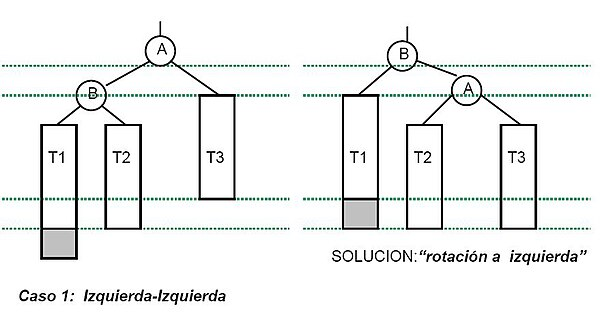

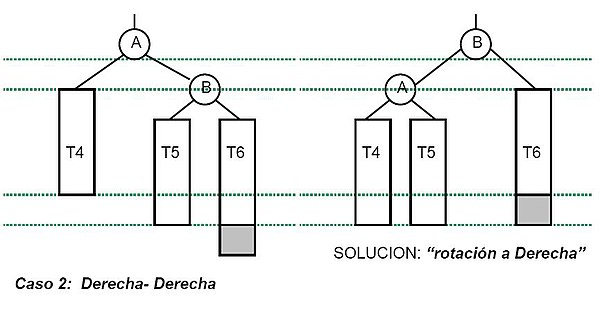

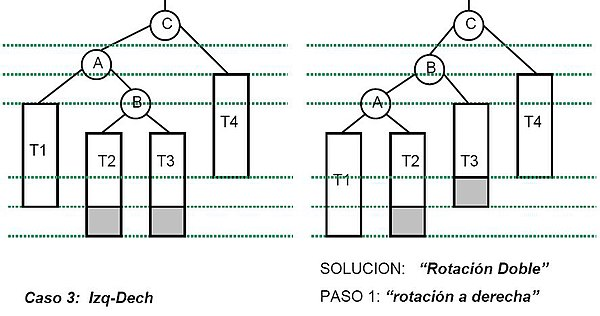


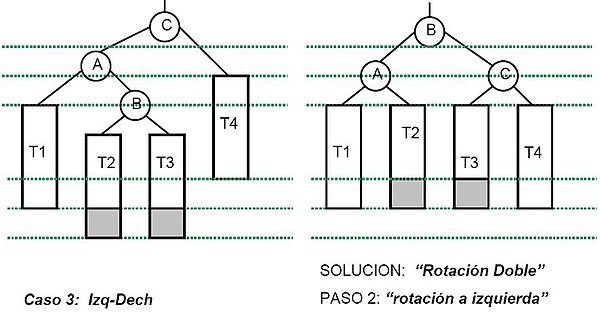

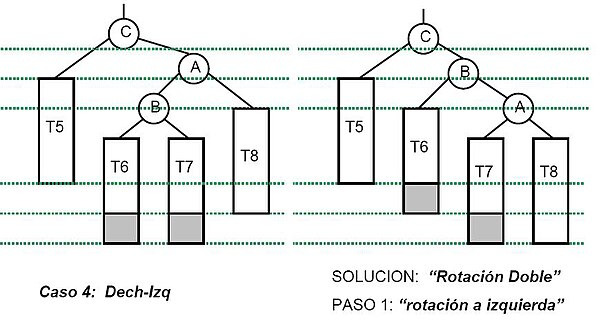

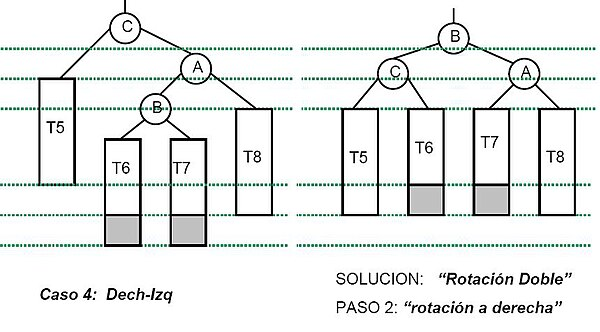

#Ejercicios


Ejercicio 1:

    Dada la secuencia de claves enteras:100,29,71,82,48,39,101,22,46, 17,3,20,25,10.Representar gráficamente el árbol AVL correspondiente.

    Elimine claves consecutivamente hasta encontrar un desequilibrio y dibuje la estructura del árbol tras efectuarse la oportuna restauración.

Ejercicio 2:

    Obtener la secuencia de rotaciones resultante de la inserción del conjunto de elementos {1,2,3,4,5,6,7,15,14,13,12,11,10,9,8} en un árbol AVL.

Ejercicio 3:

    Inserte las claves en el orden indicado a fin de incorporarlas a un árbol AVL.

    a) 10,100,20,80,40,70.
    b) 5,10,20,30,40,50,60.

Ejercicio 4:

    Dado el siguiente árbol AVL, borrar los nodos: 60, 55, 50 y 40.
    Indicar los pasos y las rotaciones realizadas, en caso de que sean necesarias. 


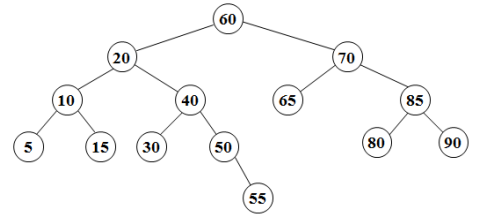

  Ejercicio 5:

      * En el siguiente ABB ¿realizar una búsqueda del elemento 8 toma cuatro comparaciones?
      * ¿Si deseamos eliminar la raíz, puede ser reemplazada por el elemento 10 sin afectar la estructura?

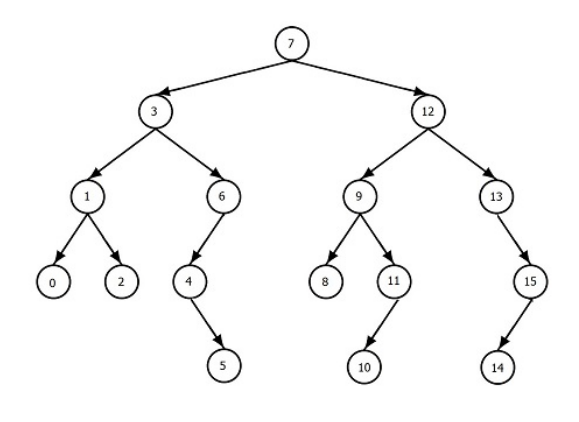

Ejercicio 6:

      Considere la siguiente estructura:

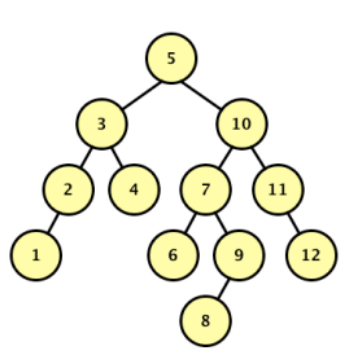

      * Demuestre que es un árbol AVL, calculando el desbalance de cada nodo en el árbol.

      * Suponga que el usuario desea insertar el elemento 13. Realice la inserción y rotaciones necesarias para mantener la estructura de árbol AVL.

      * Suponga que el usuario, después de haber insertado el elemento 13, desea eliminar el elemento 5. Realice la eliminación y rotaciones necesarias para mantener la estructura de árbol AVL.


#Un posible codigo de árbol AVL

In [1]:
"""
Árbol AVL - Implementación en Python
"""

from __future__ import print_function

"""
Declaramos la clase "Node", con cada una de sus propiedades.
"""
class Node:
    def __init__(self, label):
        self.label = label
        self._parent = None
        self._left = None
        self._right = None
        self.height = 0

    @property
    def right(self):
        return self._right

    @right.setter
    def right(self, node):
        if node is not None:
            node._parent = self
            self._right = node

    @property
    def left(self):
        return self._left

    @left.setter
    def left(self, node):
        if node is not None:
            node._parent = self
            self._left = node

    @property
    def parent(self):
        return self._parent

    @parent.setter
    def parent(self, node):
        if node is not None:
            self._parent = node
            self.height = self.parent.height + 1
        else:
            self.height = 0

# Declaramos la clase AVL
class AVL:

    def __init__(self):
        self.root = None
        self.size = 0

        """
        Operación de inserción para agregar nuevos nodos
        al árbol.
        """
    def insert(self, value):
        node = Node(value)

        if self.root is None:
            self.root = node
            self.root.height = 0
            self.size = 1
        else:
            dad_node = None
            curr_node = self.root

            while True:
                if curr_node is not None:

                    dad_node = curr_node

                    if node.label < curr_node.label:
                        curr_node = curr_node.left
                    else:
                        curr_node = curr_node.right
                else:
                    node.height = dad_node.height
                    dad_node.height += 1
                    if node.label < dad_node.label:
                        dad_node.left = node
                    else:
                        dad_node.right = node
                    self.rebalance(node)
                    self.size += 1
                    break

        # Operación de rotación
    def rebalance(self, node):
        n = node

        while n is not None:
            height_right = n.height
            height_left = n.height

            if n.right is not None:
                height_right = n.right.height

            if n.left is not None:
                height_left = n.left.height

            if abs(height_left - height_right) > 1:
                if height_left > height_right:
                    left_child = n.left
                    if left_child is not None:
                        h_right = (left_child.right.height
                                    if (left_child.right is not None) else 0)
                        h_left = (left_child.left.height
                                    if (left_child.left is not None) else 0)
                    if (h_left > h_right):
                        self.rotate_left(n)
                        break
                    else:
                        self.double_rotate_right(n)
                        break
                else:
                    right_child = n.right
                    if right_child is not None:
                        h_right = (right_child.right.height
                            if (right_child.right is not None) else 0)
                        h_left = (right_child.left.height
                            if (right_child.left is not None) else 0)
                    if (h_left > h_right):
                        self.double_rotate_left(n)
                        break
                    else:
                        self.rotate_right(n)
                        break
            n = n.parent

    def rotate_left(self, node):
        aux = node.parent.label
        node.parent.label = node.label
        node.parent.right = Node(aux)
        node.parent.right.height = node.parent.height + 1
        node.parent.left = node.right


    def rotate_right(self, node):
        aux = node.parent.label
        node.parent.label = node.label
        node.parent.left = Node(aux)
        node.parent.left.height = node.parent.height + 1
        node.parent.right = node.right

    def double_rotate_left(self, node):
        self.rotate_right(node.getRight().getRight())
        self.rotate_left(node)

    def double_rotate_right(self, node):
        self.rotate_left(node.getLeft().getLeft())
        self.rotate_right(node)

    def empty(self):
        if self.root is None:
            return True
        return False

    def preShow(self, curr_node):
        if curr_node is not None:
            self.preShow(curr_node.left)
            print(curr_node.label, end=" ")
            self.preShow(curr_node.right)

    def preorder(self, curr_node):
        if curr_node is not None:
            self.preShow(curr_node.left)
            self.preShow(curr_node.right)
            print(curr_node.label, end=" ")

    def getRoot(self):
        return self.root

if __name__ == '__main__':
    t = AVL()
    t.insert(5)
    t.insert(9)
    t.insert(13)
    t.insert(10)
    t.insert(17)
    t.preShow(t.root)

5 9 10 13 17 